# Importing the Dataset


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import seaborn as sns 
from sklearn.model_selection import train_test_split

#-----------------------------------------------------#
# The upload file from your system to use this mathod.
# It is posible for Colaboratory Online.
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['Soper.csv']))
# Here Soper.csv your file name.
#-----------------------------------------------------#

df.head()


Saving Soper.csv to Soper (7).csv


,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SF1AA2CA,2016.06,1116.386,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
1,BDCQ.SF1AA2CA,2016.09,1070.874,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
2,BDCQ.SF1AA2CA,2016.12,1054.408,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
3,BDCQ.SF1AA2CA,2017.03,1010.665,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN
4,BDCQ.SF1AA2CA,2017.06,1233.700,NaN,F,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted,NaN


# Preprocessing and Train Test Split


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import seaborn as sns 
from sklearn.model_selection import train_test_split

#-----------------------------------------------------#
# The upload file from your system to use this mathod.
# It is posible for Colaboratory Online.
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['Soper.csv']))
# Here Soper.csv your file name.
#-----------------------------------------------------#

df.head()

X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train)

Saving Soper.csv to Soper (6).csv
[['BDCQ.SF3PP1CA' 2019.09 350.96 ... 'Education and Training'
  'Current prices' 'Unadjusted']
 ['BDCQ.SF8RS1CA' 2019.09 456.722 ... 'Arts and Recreation Services'
  'Current prices' 'Unadjusted']
 ['BDCQ.SF2QQ1CA' 2020.09 2013.744 ...
  'Health Care and Social Assistance' 'Current prices' 'Unadjusted']
 ...
 ['BDCQ.SF2LL1CA' 2016.06 3666.1440000000002 ...
  'Rental, Hiring and Real Estate Services' 'Current prices' 'Unadjusted']
 ['BDCQ.SF2BB1CA' 2017.12 711.7710000000001 ... 'Mining' 'Current prices'
  'Unadjusted']
 ['BDCQ.SF3II1CA' 2018.03 1450.1960000000001 ...
  'Transport, Postal and Warehousing' 'Current prices' 'Unadjusted']]


# Classification

In [17]:

from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.7, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.9619047619047619


# Unsupervised Nearest Neighbors

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices,'\n\n',distances,'\n\n',nbrs.kneighbors_graph(X).toarray())

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]] 

 [[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]] 

 [[1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1.]]


# KDTree and BallTree Classes

In [23]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

# Comparing Nearest Neighbors with and without Neighborhood Components Analysis

Automatically created module for IPython interactive environment


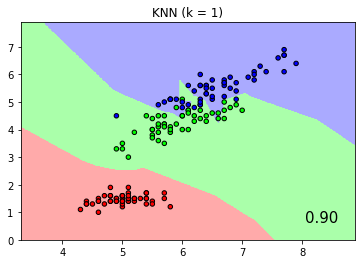

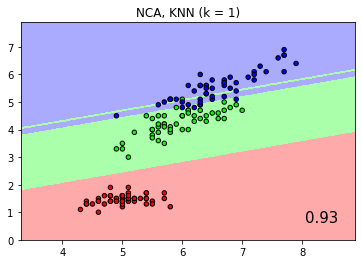

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline


print(__doc__)

n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

h = .01  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

names = ['KNN', 'NCA, KNN']

classifiers = [Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', NeighborhoodComponentsAnalysis()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ])
               ]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

# Nearest Neighbors Classification

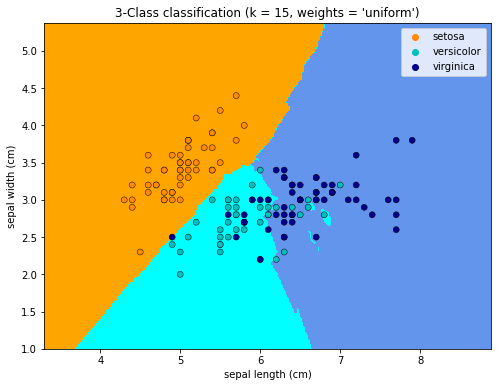

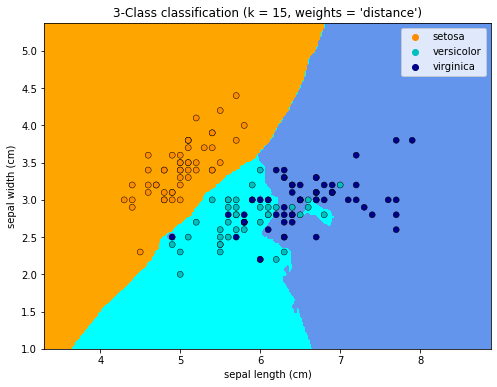

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

# Nearest Neighbors regression


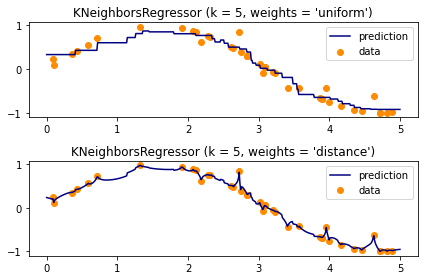

In [24]:
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

# Face completion with a multi-output estimators

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


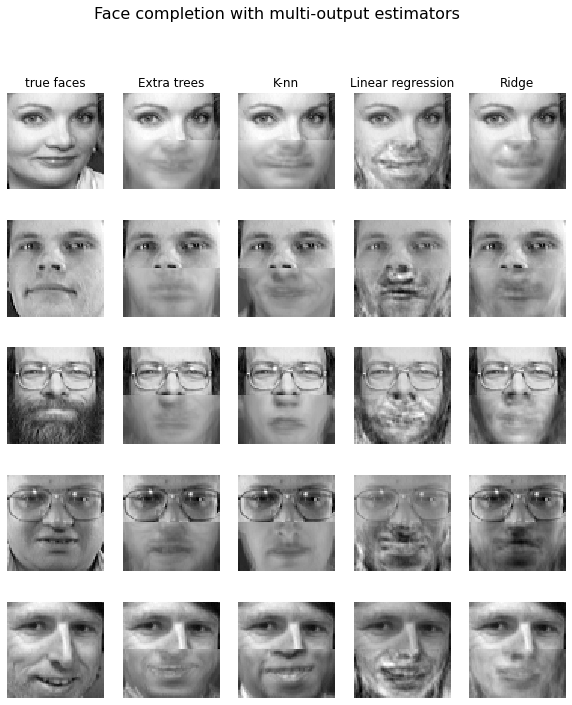

In [25]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

# Dimensionality Reduction with Neighborhood Components Analysis

Automatically created module for IPython interactive environment


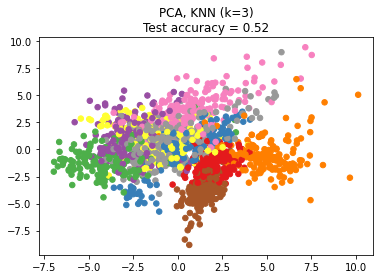

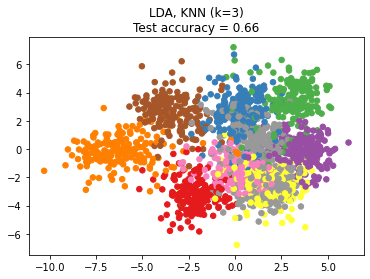

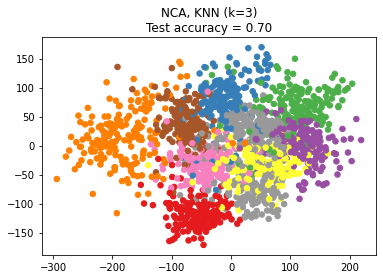

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print(__doc__)

n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()